In [1]:
import boto3

s3 = boto3.client('s3')
bucket_name = 'mjrprjct'

response = s3.list_objects_v2(Bucket=bucket_name)
files = [obj['Key'] for obj in response.get('Contents', [])]
print(files)

['ibm attrition dataset.csv']


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import boto3
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import ipywidgets as widgets
from IPython.display import display

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Load data from S3 (Modify with your S3 bucket details)
s3 = boto3.client('s3')
bucket_name = 'mjrprjct'
file_key = 'ibm attrition dataset.csv'

In [4]:
obj = s3.get_object(Bucket=bucket_name, Key=file_key)
data = pd.read_csv(io.BytesIO(obj['Body'].read()))

In [5]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   MonthlyIncome            1470 non-null   int64 
 1   Age                      1470 non-null   int64 
 2   OverTime                 1470 non-null   object
 3   TotalWorkingYears        1470 non-null   int64 
 4   DailyRate                1470 non-null   int64 
 5   HourlyRate               1470 non-null   int64 
 6   MonthlyRate              1470 non-null   int64 
 7   EmployeeNumber           1470 non-null   int64 
 8   DistanceFromHome         1470 non-null   int64 
 9   YearsAtCompany           1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  PercentSalaryHike        1470 non-null   int64 
 12  YearsWithCurrManager     1470 non-null   int64 
 13  EnvironmentSatisfaction  1470 non-null   object
 14  JobRole                  1470 non-null  

In [6]:
# Remove unnecessary columns
df = df.drop(['EmployeeNumber'], axis=1)

In [7]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   MonthlyIncome            1470 non-null   int64 
 1   Age                      1470 non-null   int64 
 2   OverTime                 1470 non-null   object
 3   TotalWorkingYears        1470 non-null   int64 
 4   DailyRate                1470 non-null   int64 
 5   HourlyRate               1470 non-null   int64 
 6   MonthlyRate              1470 non-null   int64 
 7   EmployeeNumber           1470 non-null   int64 
 8   DistanceFromHome         1470 non-null   int64 
 9   YearsAtCompany           1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  PercentSalaryHike        1470 non-null   int64 
 12  YearsWithCurrManager     1470 non-null   int64 
 13  EnvironmentSatisfaction  1470 non-null   object
 14  JobRole                  1470 non-null  

In [8]:
df = df.drop(['EmployeeNumber'], axis=1)

In [9]:
# Convert categorical 'Attrition' column to numeric
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [10]:
# Convert categorical features to one-hot encoding
df = pd.get_dummies(df, drop_first=True)

In [11]:
# Split dataset
X = df.drop(columns=['Attrition'])
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Train model
rfc= RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Predictions
y_pred = rfc.predict(X_test)

In [15]:
# Performance metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:")
print(metrics.classification_report(y_test, y_pred))

Accuracy: 0.8673469387755102
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.13      0.20        39

    accuracy                           0.87       294
   macro avg       0.69      0.55      0.57       294
weighted avg       0.83      0.87      0.83       294



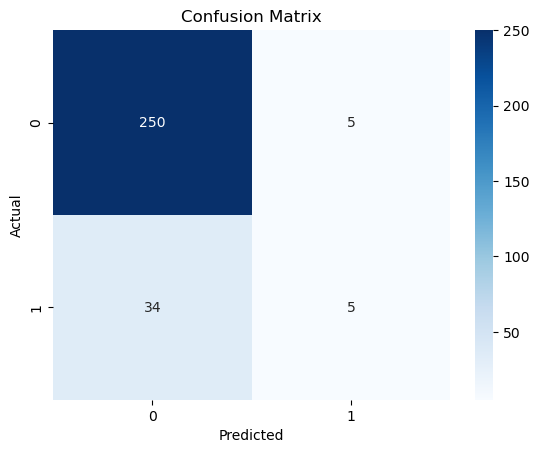

In [16]:
# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

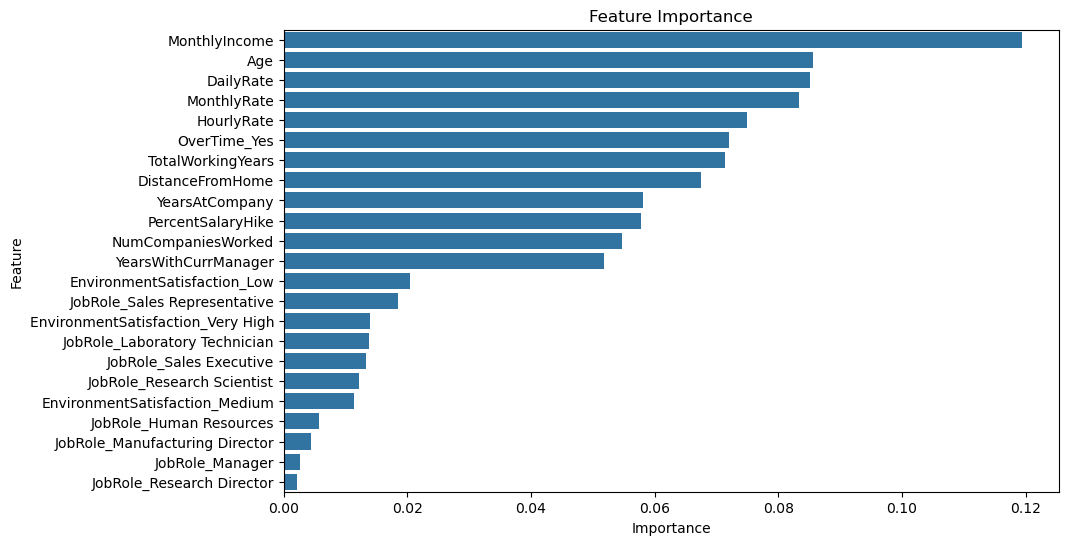

In [17]:
# Feature Importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rfc.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance')
plt.show()

In [18]:
# User Input through Widgets
user_inputs = {}
for feature in X.columns:
    user_inputs[feature] = widgets.FloatText(description=feature)

In [20]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display


# Assuming rfc and scaler are already defined and trained

user_inputs = {}
for feature in X.columns:
    user_inputs[feature] = widgets.FloatText(description=feature)  # Set default values

display(*user_inputs.values())

output = widgets.Output()

def predict_attrition(change=None):
    
    with output:
        output.clear_output()
        print("Predicting...")  # Check if the function is called
        
        # Create user data DataFrame
        user_data = pd.DataFrame([{feature: user_inputs[feature].value for feature in X.columns}])

        try:
            # Transform the data
            user_data_scaled = scaler.transform(user_data)

            # Make prediction
            prediction = rfc.predict(user_data_scaled)

            # Interpret the prediction
            result = "Attrition" if prediction[0] == 1 else "No Attrition"
            print("Prediction:", result)

        except Exception as e:
            print("An error occurred during prediction:", str(e))

# Create Predict button
predict_button = widgets.Button(description='Predict')
predict_button.on_click(predict_attrition)

# Display the button and output
display(predict_button, output)

FloatText(value=0.0, description='MonthlyIncome')

FloatText(value=0.0, description='Age')

FloatText(value=0.0, description='TotalWorkingYears')

FloatText(value=0.0, description='DailyRate')

FloatText(value=0.0, description='HourlyRate')

FloatText(value=0.0, description='MonthlyRate')

FloatText(value=0.0, description='DistanceFromHome')

FloatText(value=0.0, description='YearsAtCompany')

FloatText(value=0.0, description='NumCompaniesWorked')

FloatText(value=0.0, description='PercentSalaryHike')

FloatText(value=0.0, description='YearsWithCurrManager')

FloatText(value=0.0, description='OverTime_Yes')

FloatText(value=0.0, description='EnvironmentSatisfaction_Low')

FloatText(value=0.0, description='EnvironmentSatisfaction_Medium')

FloatText(value=0.0, description='EnvironmentSatisfaction_Very High')

FloatText(value=0.0, description='JobRole_Human Resources')

FloatText(value=0.0, description='JobRole_Laboratory Technician')

FloatText(value=0.0, description='JobRole_Manager')

FloatText(value=0.0, description='JobRole_Manufacturing Director')

FloatText(value=0.0, description='JobRole_Research Director')

FloatText(value=0.0, description='JobRole_Research Scientist')

FloatText(value=0.0, description='JobRole_Sales Executive')

FloatText(value=0.0, description='JobRole_Sales Representative')

Button(description='Predict', style=ButtonStyle())

Output()